In [25]:
import pandas as pd
import numpy as np

# pomiary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statistics import mean

from sklearn import metrics

# k-krotny sprawdzian krzyżowy
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Regresja i klasyfikacja bazowa
from sklearn.datasets import make_classification 
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

# ocena prognoz klasyfiatora binarnego
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# wykresy
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# get data
data = pd.read_csv('diabetes.csv')

# preprocess data
features = data.drop(["Outcome"], axis=1)
target = data["Outcome"]
data.tail(100)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
668            6       98             58             33      190  34.0                     0.430   43        0
669            9      154             78             30      100  30.9                     0.164   45        0
670            6      165             68             26      168  33.6                     0.631   49        0
671            1       99             58             10        0  25.4                     0.551   21        0
672           10       68            106             23       49  35.5                     0.285   47        0
..           ...      ...            ...            ...      ...   ...                       ...  ...      ...
763           10      101             76             48      180  32.9                     0.171   63        0
764            2      122             70             27        0  36.8                     0.340   27        0
765            5      121             72             23      112  26.2                     0.245   30        0
766            1      126             60              0        0  30.1                     0.349   47        1
767            1       93             70             31        0  30.4                     0.315   23        0

[100 rows x 9 columns]

In [27]:
# k-krotny sprawdzian krzyżowy
standardizer = StandardScaler()

# utworzenie obiektu regresji logistycznej
logit = LogisticRegression()
# Utworzenie  potoku standaryzującego, 
# a następnie przeprowadzająego regresję logistyczną
pipeline = make_pipeline(standardizer, logit)

# Zdefiniowanie k-krotnego sprawdzianu krzyżowego
k=10
kf = KFold(n_splits=k, shuffle=True, random_state=1)

# Przeprowadzanie k-krotnego sprawdzianu krzyżowego
cv_results = cross_val_score(pipeline, # potok
                            features, # Macierz cech
                            target, # Wektor docelowy
                            cv=kf, # Technika sprawdzianu krzyżowego
                            scoring="accuracy", # Funkcja straty
                            n_jobs=-1) # Użycie wszystkich dostępnych rdzeni procesora

print(f"K-Fold(k={k}): {cv_results.mean()}")

K-Fold(k=10): 0.7733424470266576


In [28]:
# Tworzenie modelu regresji bazowej
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

dummy = DummyRegressor(strategy="mean")
dummy.fit(features_train, target_train)
print("Dummy regresssor score:", dummy.score(features_test, target_test))


Dummy regresssor score: -0.005514199062586211


In [29]:
# Tworzenie modelu klasyfikacji bazowej
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=0)
dummy = DummyClassifier(strategy="uniform", random_state=1)
dummy.fit(features_train, target_train)
print("Dummy classifier score:", dummy.score(features_test, target_test))

Dummy classifier score: 0.5


In [30]:
#ocena prognoz klasyfikatora binarnego
X, y = make_classification(n_samples=10000,
                          n_features=4,
                          n_informative=4,
                          n_redundant=0,
                          n_classes=2,
                          random_state=1)
logit = LogisticRegression()
print("Logistic Regression prediction score:", cross_val_score(logit, X, y, scoring='accuracy').mean())

Logistic Regression prediction score: 0.8582000000000001


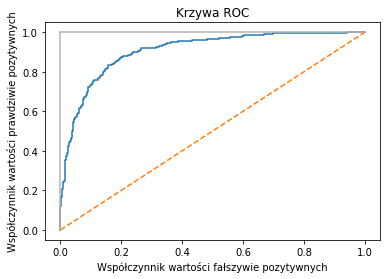

ROCAUC: 0.9074909963985595


In [34]:
#ocena progowania klasyfikatora binarnego
from sklearn.datasets import make_classification
features, target = make_classification(n_samples=10000,
                                      n_features=10,
                                      n_classes=2,
                                      n_informative=3,
                                      random_state=3)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# logit = LogisticRegression()
# logit.fit(features_train, target_train)
# target_probabilities = logit.predict_proba(features_test)[:,1]

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(features, target)
target_probabilities = lda.predict_proba(features_test)[:,1]

false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

plt.title("Krzywa ROC")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("Współczynnik wartości prawdziwie pozytywnych")
plt.xlabel("Współczynnik wartości fałszywie pozytywnych")
plt.show()
print("ROCAUC:", roc_auc_score(target_test, target_probabilities))